## Housing price prediction model for assisting the real-estate market in Austria

#### Problem statement:
Attached you’ll find a web scraper script “scraper_interview.py” to retrieve information about real estates in Austria. Execute this script, cache, save or store the data, bring it into a structured format, clean it, check its validity, and create a model
to predict prices out of sample. Please tell us about your assumptions and interpret the results.

Question - Let’s assume you are a potential buyer of a flat and use this model to base your purchase decision on. What are the weaknesses of your model and your data? If you like you can also try to scrape more detailed information about the flats or enrich it with additional data.

#### Synopysis:
Objective – Creating a model to predict prices of housing property in Wein/Vienna region of Austria.

#### Steps:
1. Data extraction - Web scraping from www.immobilienscout24.at
2. Data flattening
3. Data quality check and pre-processing
4. Exploratory data analysis
5. Data split and transformation
6. Model building and evaluation
7. Checking Assumptions and plotting model performance

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import json
from pandas import json_normalize
import requests_cache

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import preprocessing methods
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy import stats
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import statsmodels.api as sm

# Import models and metrics methods
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Step1: Data extraction - Web scraping

In [2]:
# # %load scraper_interview.py
# # !/usr/bin/python3

# #Importing libraries
# from bs4 import BeautifulSoup
# import json
# import urllib.request as urllib2
# import random
# from random import choice
# import numpy as np
# import time
# import logging

# def urlquery(url):
#     try:
#         sleeptime = float(random.randint(1, 3)) / 10
#         time.sleep(sleeptime)

#         agents = ['Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2) AppleWebKit/537.17 (KHTML, like Gecko) Chrome/24.0.1309.0 Safari/537.17',
#         'Mozilla/5.0 (compatible; MSIE 10.6; Windows NT 6.1; Trident/5.0; InfoPath.2; SLCC1; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729; .NET CLR 2.0.50727) 3gpp-gba UNTRUSTED/1.0',
#         'Opera/12.80 (Windows NT 5.1; U; en) Presto/2.10.289 Version/12.02',
#         'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)',
#         'Mozilla/3.0',
#         'Mozilla/5.0 (iPhone; U; CPU like Mac OS X; en) AppleWebKit/420+ (KHTML, like Gecko) Version/3.0 Mobile/1A543a Safari/419.3',
#         'Mozilla/5.0 (Linux; U; Android 0.5; en-us) AppleWebKit/522+ (KHTML, like Gecko) Safari/419.3',
#         'Opera/9.00 (Windows NT 5.1; U; en)']

#         agent = choice(agents)
#         opener = urllib2.build_opener()
#         opener.addheaders = [('User-agent', agent)]

#         html = opener.open(url).read()
#         time.sleep(sleeptime)
        
#         return html

#     except Exception as e:
#         print('Something went wrong with Crawling:\n%s' % e)


# def get_real_estates(pages=20):
# #     urls = list()
# #     exposeids = list()
#     data = list()
#     for page in range(pages):
#         print(f'parsing page no: {page}')

#         base_url = 'https://www.immobilienscout24.at/regional/wien/wien/wohnung-kaufen'  
#         if page == 0:
#             page_url = ''
#         else:
#             page += 1
#             page_url = f'/seite-{page}'
#         url = base_url + page_url

#         flats = urlquery(url) 
#         soupflats = BeautifulSoup(flats, 'html.parser') 
#         scriptsflats = soupflats.findAll('script') 
        
#         flats_dict = scriptsflats[0].contents[0].string
#         flats_str = flats_dict.split('\n')[0].split("window.__INITIAL_STATE__=")[1]
#         list_of_flats = json.loads(flats_str)['reduxAsyncConnect']['pageData']['results']['hits']

#         list_of_flats[0].keys()

#         for flat in list_of_flats:
# #             urls.append(flat['links']['targetURL'])
# #             exposeids.append(flat['exposeId'])
#             data.append(flat)

#     return data


In [3]:
#Extracting data from webpage

# datain = get_real_estates()
# len(datain)

In [4]:
## Saving a copy of web scraped JSON file to avoid repeated web-scraping requests

# with open('immobilienscout24_scraped_data.json', 'w') as file:
#     json.dump(datain, file)

### Step2: Data flattening

In [3]:
#load data using Python JSON module for processing

json_datain = json.load(open('immobilienscout24_scraped_data.json'))

In [4]:
#Flattening json data to tabular format

df_flat = pd.json_normalize(json_datain,errors='ignore') 

df_flat.info()
df_flat.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 27 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   displayType                                   500 non-null    object
 1   addressString                                 500 non-null    object
 2   badges                                        500 non-null    object
 3   exposeId                                      500 non-null    object
 4   hasRealtorLogo                                500 non-null    bool  
 5   headline                                      500 non-null    object
 6   imageBadges                                   500 non-null    object
 7   keyFacts                                      500 non-null    object
 8   mainKeyFacts                                  500 non-null    object
 9   priceKeyFacts                                 500 non-null    object
 10  pi

,displayType,addressString,badges,exposeId,hasRealtorLogo,headline,imageBadges,keyFacts,mainKeyFacts,priceKeyFacts,...,realtorContact.name,realtorContact.contactImageProps.placeholder,realtorContact.contactImageProps.src,realtorContact.contactImageProps.srcSet,realtorContact.contactImageProps.sizes,isPrivate,primaryPictureImageProps.placeholder,primaryPictureImageProps.src,primaryPictureImageProps.srcSet,primaryPictureImageProps.sizes
0,DEVELOPER_PREMIUM,"Wohllebengasse 3-5, 1040 Wien","[{'label': 'Neubauprojekt', 'value': 'DEVELOPE...",5d516ed76222b820008bf0a6,True,NEW PRESTIGE - Luxus Residenzen in Premium Lage,[],[],"[{'value': '3 – 3', 'label': 'Zimmer'}, {'valu...","[{'value': 'Preis auf Anfrage', 'label': None}]",...,Mag. Alexander Temmer,None,None,None,None,NaN,NaN,NaN,NaN,NaN
1,DEVELOPER_PREMIUM,1210 Wien,"[{'label': 'Neubauprojekt', 'value': 'DEVELOPE...",60054b9123c9b9001f222616,True,Wohnen im Grünen in Floridsdorf – Erstbezug im...,[],[],"[{'value': '3 – 4', 'label': 'Zimmer'}, {'valu...","[{'value': '336.363 € – 372.727,27 €', 'label'...",...,Virginia Pail,https://pictures.immobilienscout24.de/dims3/S3...,https://pictures.immobilienscout24.de/dims3/S3...,,,NaN,NaN,NaN,NaN,NaN
2,DEVELOPER_PREMIUM,"Schweizertalstraße, 1130 Wien","[{'label': 'Neubauprojekt', 'value': 'DEVELOPE...",5f860333b5632a0020f0de02,True,"Exklusives Wohnen im Grünen, Hallo grünes Hiet...",[],[],"[{'value': '2 – 5', 'label': 'Zimmer'}, {'valu...","[{'value': '329.000 € – 1.320.000 €', 'label':...",...,Ehsan Karimian,https://pictures.immobilienscout24.de/dims3/S3...,https://pictures.immobilienscout24.de/dims3/S3...,,,NaN,NaN,NaN,NaN,NaN
3,DEVELOPER_PREMIUM,"Bernardgasse 18, 1070 Wien","[{'label': 'Neubauprojekt', 'value': 'DEVELOPE...",608a6c3674d496001f88f14c,True,DAS BERNARD - Stilvoll wohnen im Siebten,[],[],"[{'value': '1 – 4', 'label': 'Zimmer'}, {'valu...","[{'value': 'Preis auf Anfrage', 'label': None}]",...,Mag. Alexander Temmer,https://pictures.immobilienscout24.de/dims3/S3...,https://pictures.immobilienscout24.de/dims3/S3...,,,NaN,NaN,NaN,NaN,NaN
4,DEVELOPER_PREMIUM,1220 Wien,"[{'label': 'Neubauprojekt', 'value': 'DEVELOPE...",605c44b85b05a10020f6a687,True,Nachhaltiges Neubauprojekt in Wien 22,[],[],"[{'value': '2 – 4', 'label': 'Zimmer'}, {'valu...","[{'value': '290.494 € – 619.137 €', 'label': N...",...,Service Team,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [5]:
#From the above data, it is evident that the key attributes 'badges', 'mainKeyFacts' and 'priceKeyFacts' still have nested data.
#Applying 2nd level normalization to flatten the above attributes

#1 Badges

badges_flat = json_normalize(data=json_datain,record_path=["badges"],meta=["exposeId"],errors="ignore")

badges_flat = pd.get_dummies(badges_flat, prefix="badges",columns=['label'],drop_first=True)
badges_flat = badges_flat.drop('value',axis=1)

badges_flat = badges_flat.groupby(['exposeId']).sum()
badges_flat = badges_flat.reset_index()

#2 mainKeyFacts

mainKeyFacts_flat = json_normalize(data=json_datain,record_path=["mainKeyFacts"],meta=["exposeId"],errors="ignore") 

mainKeyFacts_flat = mainKeyFacts_flat.pivot(index='exposeId', columns='label', values='value')
mainKeyFacts_flat = mainKeyFacts_flat.reset_index()

#3 priceKeyFacts

priceKeyFacts_flat = json_normalize(data=json_datain,record_path=["priceKeyFacts"],meta=["exposeId"],errors="ignore")
priceKeyFacts_flat = priceKeyFacts_flat.drop('label',axis=1)

df_flat.shape, badges_flat.shape, mainKeyFacts_flat.shape, priceKeyFacts_flat.shape

((500, 27), (459, 10), (499, 4), (500, 2))

In [6]:
#Merging the flattened attributes back to main dataset

inpt_df = df_flat.merge(badges_flat, how='left', on=['exposeId']).merge(mainKeyFacts_flat, how='left', on=['exposeId']).merge(priceKeyFacts_flat, how='left', on=['exposeId'])

print("No of unique records: \n", inpt_df['exposeId'].nunique())
inpt_df.info()

No of unique records: 
 500
<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   displayType                                   500 non-null    object 
 1   addressString                                 500 non-null    object 
 2   badges                                        500 non-null    object 
 3   exposeId                                      500 non-null    object 
 4   hasRealtorLogo                                500 non-null    bool   
 5   headline                                      500 non-null    object 
 6   imageBadges                                   500 non-null    object 
 7   keyFacts                                      500 non-null    object 
 8   mainKeyFacts                                  500 non-null    object 
 9   priceKeyFacts                        

### Step3: Data quality check and pre-processing

In [7]:
#--------------------------------------------------------------
#1. Elimination of insignificant variables
#--------------------------------------------------------------

# Dropping unnecessary features which do not contribute significantly
inpt_df = inpt_df.drop(['badges','headline','imageBadges','keyFacts','mainKeyFacts','priceKeyFacts','picturesImageProps',
                        'realtorLogoImageProps.placeholder','realtorLogoImageProps.src', 'realtorLogoImageProps.srcSet',
                        'realtorLogoImageProps.sizes','realtorContact.contactImageProps.placeholder','links.targetURL',
                        'realtorContact.contactImageProps.src','realtorContact.contactImageProps.srcSet','realtorContact.name',
                        'realtorContact.contactImageProps.sizes','primaryPictureImageProps.placeholder','Etage',
                        'primaryPictureImageProps.src','primaryPictureImageProps.srcSet','primaryPictureImageProps.sizes'],axis=1)


#Renaming the columns for easy accesability
inpt_df.rename(columns = {'badges_Balkon':'balcony', 'badges_Garten':'garden','badges_Möbliert':'fully_furnished',
                         'badges_Neubauprojekt':'new_project', 'badges_Parkplatz':'parking','badges_Teilmöbliert':'partially_furnished',
                         'badges_Terrasse':'terrace', 'badges_Video Live-Besichtigung':'video_tour','badges_neu':'new_building',
                         'Fläche':'area_m2','Zimmer':'rooms','value':'price','hasRealtorLogo':'hasrealtorlogo',
                          'realtorContact.company':'hasrealtorcontact'}, inplace = True)

In [8]:
#--------------------------------------------------------------
#2. Data cleaning
#--------------------------------------------------------------

# Excluding the insignificant data observations
    #price field is the target variable. The value 'Preis auf Anfrage'/'price on demand' does not contribute to the model training. 
    #Hence the 26 records with this value are dropped from the dataset

inpt_df = inpt_df[inpt_df.price != 'Preis auf Anfrage']

#Replacing the special characters from numeric attributes

inpt_df['price'] = inpt_df['price'].replace({'€': '','ab ': '',' –': ''}, regex=True)
inpt_df['area_m2'] = inpt_df['area_m2'].replace({'m²': '',',':'.',' –': ''}, regex=True)
inpt_df['rooms'] = inpt_df['rooms'].replace({'4 – 4': '4','3 – 3': '3',' –': ''}, regex=True)

#Creating new attributes
    # only 4 digit and 2 digit zip code is extracted from address data, as City name is same for all observations and the street name holds
    # no greater significance. 

inpt_df['zipcode'] = inpt_df['addressString'].str.extract(r'(\d{4}\-?)')
inpt_df['zip_2byte'] = inpt_df.zipcode.astype(str).str[:2].astype(int)

inpt_df

,displayType,addressString,exposeId,hasrealtorlogo,hasrealtorcontact,isPrivate,balcony,garden,fully_furnished,new_project,parking,partially_furnished,terrace,video_tour,new_building,area_m2,rooms,price,zipcode,zip_2byte
1,DEVELOPER_PREMIUM,1210 Wien,60054b9123c9b9001f222616,True,LANDAA Immobilien GmbH,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,72.72 79.45,3 4,"336.363 372.727,27",1210,12
2,DEVELOPER_PREMIUM,"Schweizertalstraße, 1130 Wien",5f860333b5632a0020f0de02,True,Immocity Real Estate GmbH,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,41.07 161.82,2 5,329.000 1.320.000,1130,11
4,DEVELOPER_PREMIUM,1220 Wien,605c44b85b05a10020f6a687,True,Mischek Bauträger Service GmbH,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,54.4 114.71,2 4,290.494 619.137,1220,12
5,DEVELOPER_PREMIUM,"Maximilian-Reich-Weg 4, 1210 Wien",601a67351a2dac001fea7f87,True,Haring Group Bauträger GmbH,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,32.55 92.4,1 4,160.200 492.700,1210,12
6,DEVELOPER_PREMIUM,1030 Wien,5ee245b1f00e3a0021767995,True,Immocity Real Estate GmbH,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.12 78.33,2 3,320.000 535.000,1030,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,REGULAR,"Schönbrunner Straße 201, 1120 Wien",60b0d80825e1a5001f814c11,True,NaN,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,60,2,219.000,1120,11
496,REGULAR,1200 Wien,60b0d6bd57ac410021257b39,False,NaN,False,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,44.68,1,195.000,1200,12
497,REGULAR,"Lerchenfelder Straße 144, 1080 Wien",60b0d3fb57ac4100212571e4,True,NaN,False,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,72.55,2,899.000,1080,10
498,REGULAR,"Migazziplatz, 1120 Wien",60b0d38225e1a5001f813cfc,True,NaN,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,76.45,3,410.000,1120,11


In [9]:
#--------------------------------------------------------------
#3. Extraction of additional details
#--------------------------------------------------------------

#Extraction of additional data from price, area_m2 and rooms attributes
    # The above 3 numeric fields are in the form of ranges (min to max) and hence are not compatible for data processing.
    # The records with range values are therefore split into 2 records, one with minimum value for all 3 fields and the other 
    # with maximum value to retain all the information intact. """

inpt_df_exp = inpt_df.copy()

price_stack = inpt_df_exp.drop('price', axis=1).join(inpt_df_exp.price.str.split(expand=True)
             .stack().reset_index(drop=True, level=1).rename('price'))

area_stack = price_stack.drop('area_m2', axis=1).join(price_stack.area_m2.str.split(expand=True)
             .stack().reset_index(drop=True, level=1).rename('area_m2'))

room_stack = area_stack.drop('rooms', axis=1).join(area_stack.rooms.str.split(expand=True)
             .stack().reset_index(drop=True, level=1).rename('rooms'))

    #The output of one stack() function is fed as input to other and hence the final record count will have various
    #combinations of the above 3 fields(cartesian product). As we need only 2 record combinations (min and max),
    # the records are de-duped using exposeId and combined_key as key

room_stack['combined_key']= room_stack['exposeId'].str.cat(room_stack['price'],sep="_").str.cat(room_stack['area_m2'],sep="_").str.cat(room_stack['rooms'],sep="_")

d1 = room_stack.drop_duplicates(subset='exposeId', keep="first")
d2 = room_stack.drop_duplicates(subset='exposeId', keep="last")
inpt_df_explode = pd.concat([d1,d2])

inpt_df_explode = inpt_df_explode.drop_duplicates(subset='combined_key', keep="first")

inpt_df_explode

,displayType,addressString,exposeId,hasrealtorlogo,hasrealtorcontact,isPrivate,balcony,garden,fully_furnished,new_project,...,partially_furnished,terrace,video_tour,new_building,zipcode,zip_2byte,price,area_m2,rooms,combined_key
1,DEVELOPER_PREMIUM,1210 Wien,60054b9123c9b9001f222616,True,LANDAA Immobilien GmbH,NaN,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1210,12,336.363,72.72,3,60054b9123c9b9001f222616_336.363_72.72_3
2,DEVELOPER_PREMIUM,"Schweizertalstraße, 1130 Wien",5f860333b5632a0020f0de02,True,Immocity Real Estate GmbH,NaN,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1130,11,329.000,41.07,2,5f860333b5632a0020f0de02_329.000_41.07_2
4,DEVELOPER_PREMIUM,1220 Wien,605c44b85b05a10020f6a687,True,Mischek Bauträger Service GmbH,NaN,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1220,12,290.494,54.4,2,605c44b85b05a10020f6a687_290.494_54.4_2
5,DEVELOPER_PREMIUM,"Maximilian-Reich-Weg 4, 1210 Wien",601a67351a2dac001fea7f87,True,Haring Group Bauträger GmbH,NaN,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1210,12,160.200,32.55,1,601a67351a2dac001fea7f87_160.200_32.55_1
6,DEVELOPER_PREMIUM,1030 Wien,5ee245b1f00e3a0021767995,True,Immocity Real Estate GmbH,NaN,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1030,10,320.000,52.12,2,5ee245b1f00e3a0021767995_320.000_52.12_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,DEVELOPER_LIGHT,"Fundergasse 6, 1220 Wien",5e5d244765158600213fde12,True,NaN,False,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1220,12,349.900,144.88,5,5e5d244765158600213fde12_349.900_144.88_5
90,DEVELOPER_LIGHT,"Gersthofer Straße 119, 1180 Wien",5e66523f691a6000225ec89d,True,NaN,False,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1180,11,309.000,119.87,5,5e66523f691a6000225ec89d_309.000_119.87_5
91,DEVELOPER_LIGHT,1220 Wien,5f228e0ce3befe0021b8eca2,True,NaN,False,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1220,12,152.010,94,4,5f228e0ce3befe0021b8eca2_152.010_94_4
92,DEVELOPER_LIGHT,1210 Wien,604892cd9456e4001f1dcf0f,True,NaN,False,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1210,12,"259.000,1",127.14,5,"604892cd9456e4001f1dcf0f_259.000,1_127.14_5"


In [10]:
#--------------------------------------------------------------
#4. Feature encoding and currency conversion
#--------------------------------------------------------------

#Encoding the categorical variables as model accepts only numeric attributes

inpt_df_t = inpt_df_explode.copy()
labelencoder = LabelEncoder()

inpt_df_t['hasrealtorlogo'] = labelencoder.fit_transform(inpt_df_t['hasrealtorlogo'])
inpt_df_t['hasrealtorcontact'] = inpt_df_t['hasrealtorcontact'].map(lambda x: 0 if pd.isnull(x) else 1)

#performing currency conversion from European currency format to ease arithmetic operations

inpt_df_t['price'] = inpt_df_t['price'].str.replace('.','').str.replace(',','.')
inpt_df_t['price'] = round(inpt_df_t['price'].astype(float))
inpt_df_t['area_m2'] = inpt_df_t['area_m2'].astype(float)
inpt_df_t['rooms'] = inpt_df_t['rooms'].astype(float)

#Dropping the unnecessary fields from the final cleansed file
inpt_df_cleaned = inpt_df_t.drop(['displayType','exposeId','addressString','isPrivate','combined_key','zipcode'],axis=1)
inpt_df_cleaned
inpt_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507 entries, 1 to 93
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   hasrealtorlogo       507 non-null    int64  
 1   hasrealtorcontact    507 non-null    int64  
 2   balcony              466 non-null    float64
 3   garden               466 non-null    float64
 4   fully_furnished      466 non-null    float64
 5   new_project          466 non-null    float64
 6   parking              466 non-null    float64
 7   partially_furnished  466 non-null    float64
 8   terrace              466 non-null    float64
 9   video_tour           466 non-null    float64
 10  new_building         466 non-null    float64
 11  zip_2byte            507 non-null    int32  
 12  price                507 non-null    float64
 13  area_m2              507 non-null    float64
 14  rooms                506 non-null    float64
dtypes: float64(12), int32(1), int64(2)
memory

### Step4: Exploratory data analysis

In [12]:
def univariate_eda(df, cols, n_cols = 3, figsize = None):
    
    # univariate eda for categorical features
    n_rows = len(cols)/n_cols
    total = float(len(df))
    
    plt.figure(figsize=(5*n_cols,5*n_rows))
    
    if figsize:
        plt.figure(figsize=figsize)
    
    for i in range(0,len(cols)):
        plt.subplot(n_rows+1, n_cols, (i+1))
        ax = sns.countplot(df[cols[i]], palette=["#3299CC", "#87CEFA", "#B2DFEE", "#BFEFFF"]) 
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:4.2f}%'.format(100 * p.get_height()/(len(inpt_df))),
            ha="center") 
    plt.show()

<AxesSubplot:>

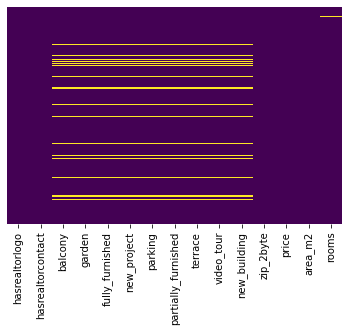

In [13]:
# Missing values check - The heapmap shows presence of null values in additional feature fields

sns.heatmap(inpt_df_cleaned.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='price', ylabel='Density'>

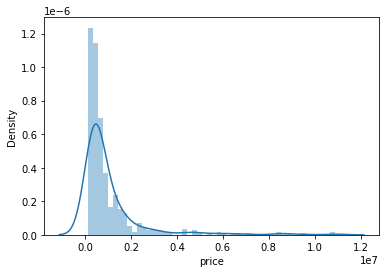

In [14]:
# How is the distribution of Target variable?
    # The target variable is normally distributed with long tail on the right side
    # The outliers on the right extreme are assumed as legit considering the values of respective area and number of room fields

sns.distplot(inpt_df_cleaned['price'])

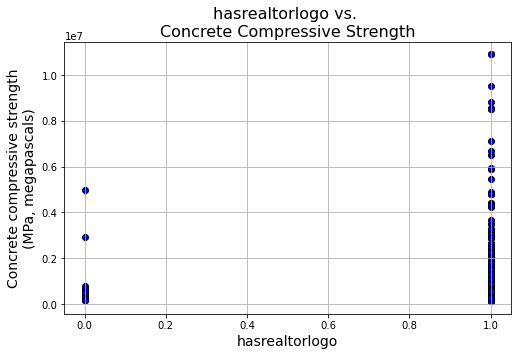

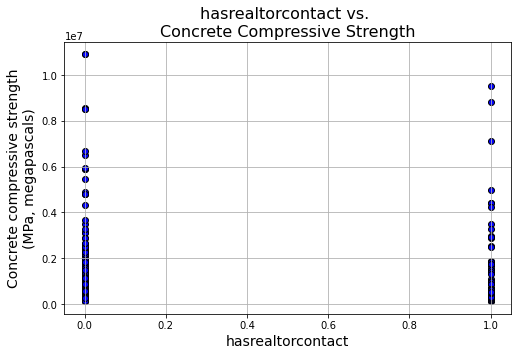

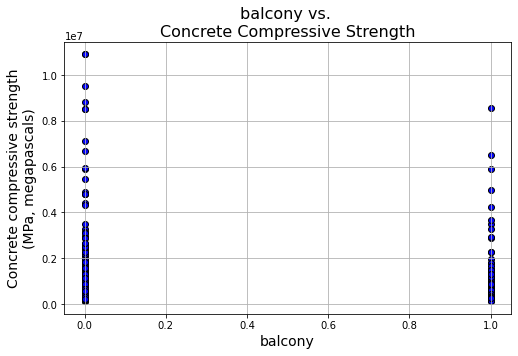

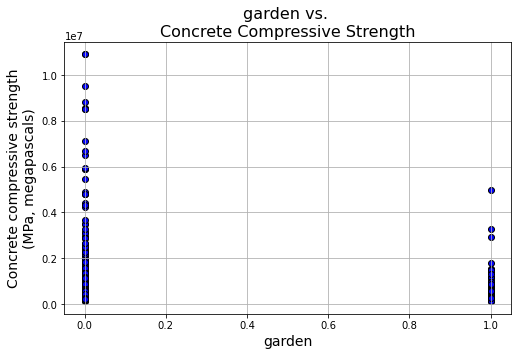

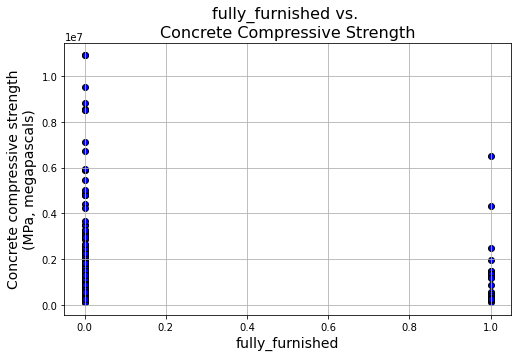

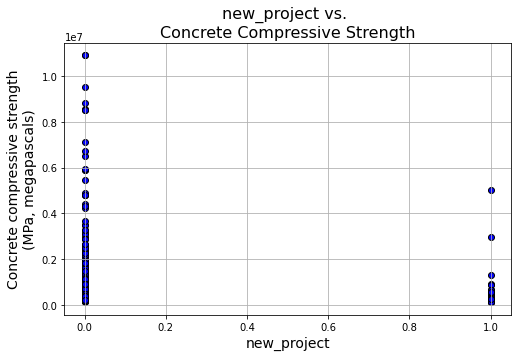

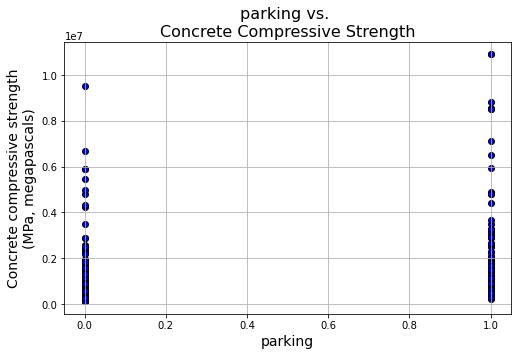

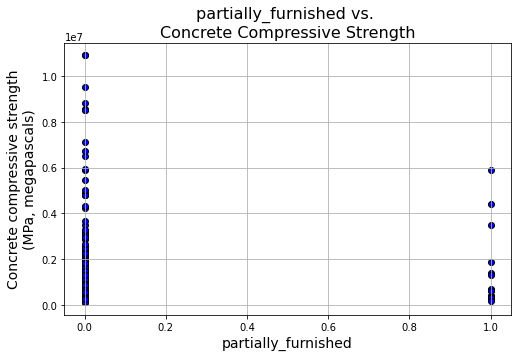

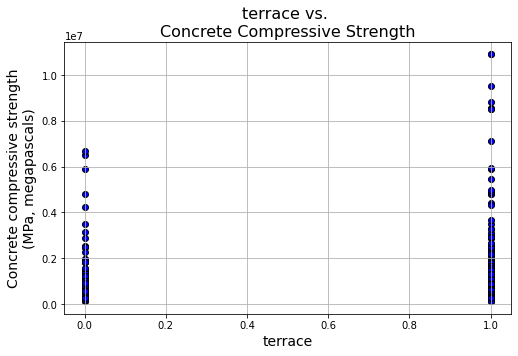

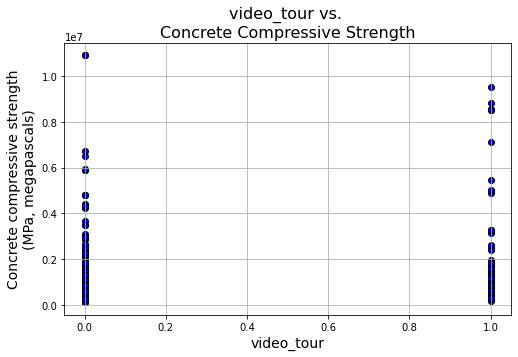

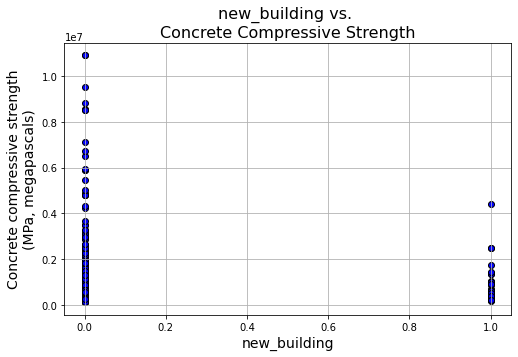

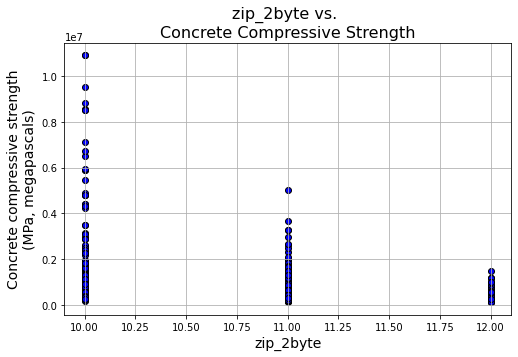

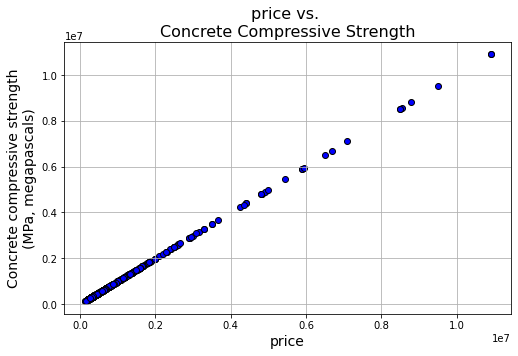

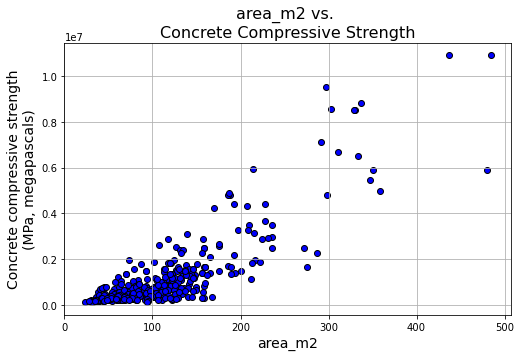

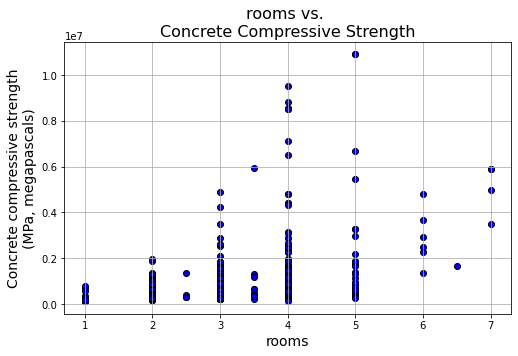

In [15]:
# How is the relation relationship between the predicting variables and the response
    # All expect area_m2 are discrete fields. The relation of area_m2 wrt target variable 'price' is linear

for c in inpt_df_cleaned.columns[:]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nConcrete Compressive Strength".format(c),fontsize=16)
    plt.scatter(x=inpt_df_cleaned[c],y=inpt_df_cleaned['price'],color='blue',edgecolor='k')
    plt.grid(True)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Concrete compressive strength\n(MPa, megapascals)',fontsize=14)
    plt.show()

<Figure size 1080x1440 with 0 Axes>

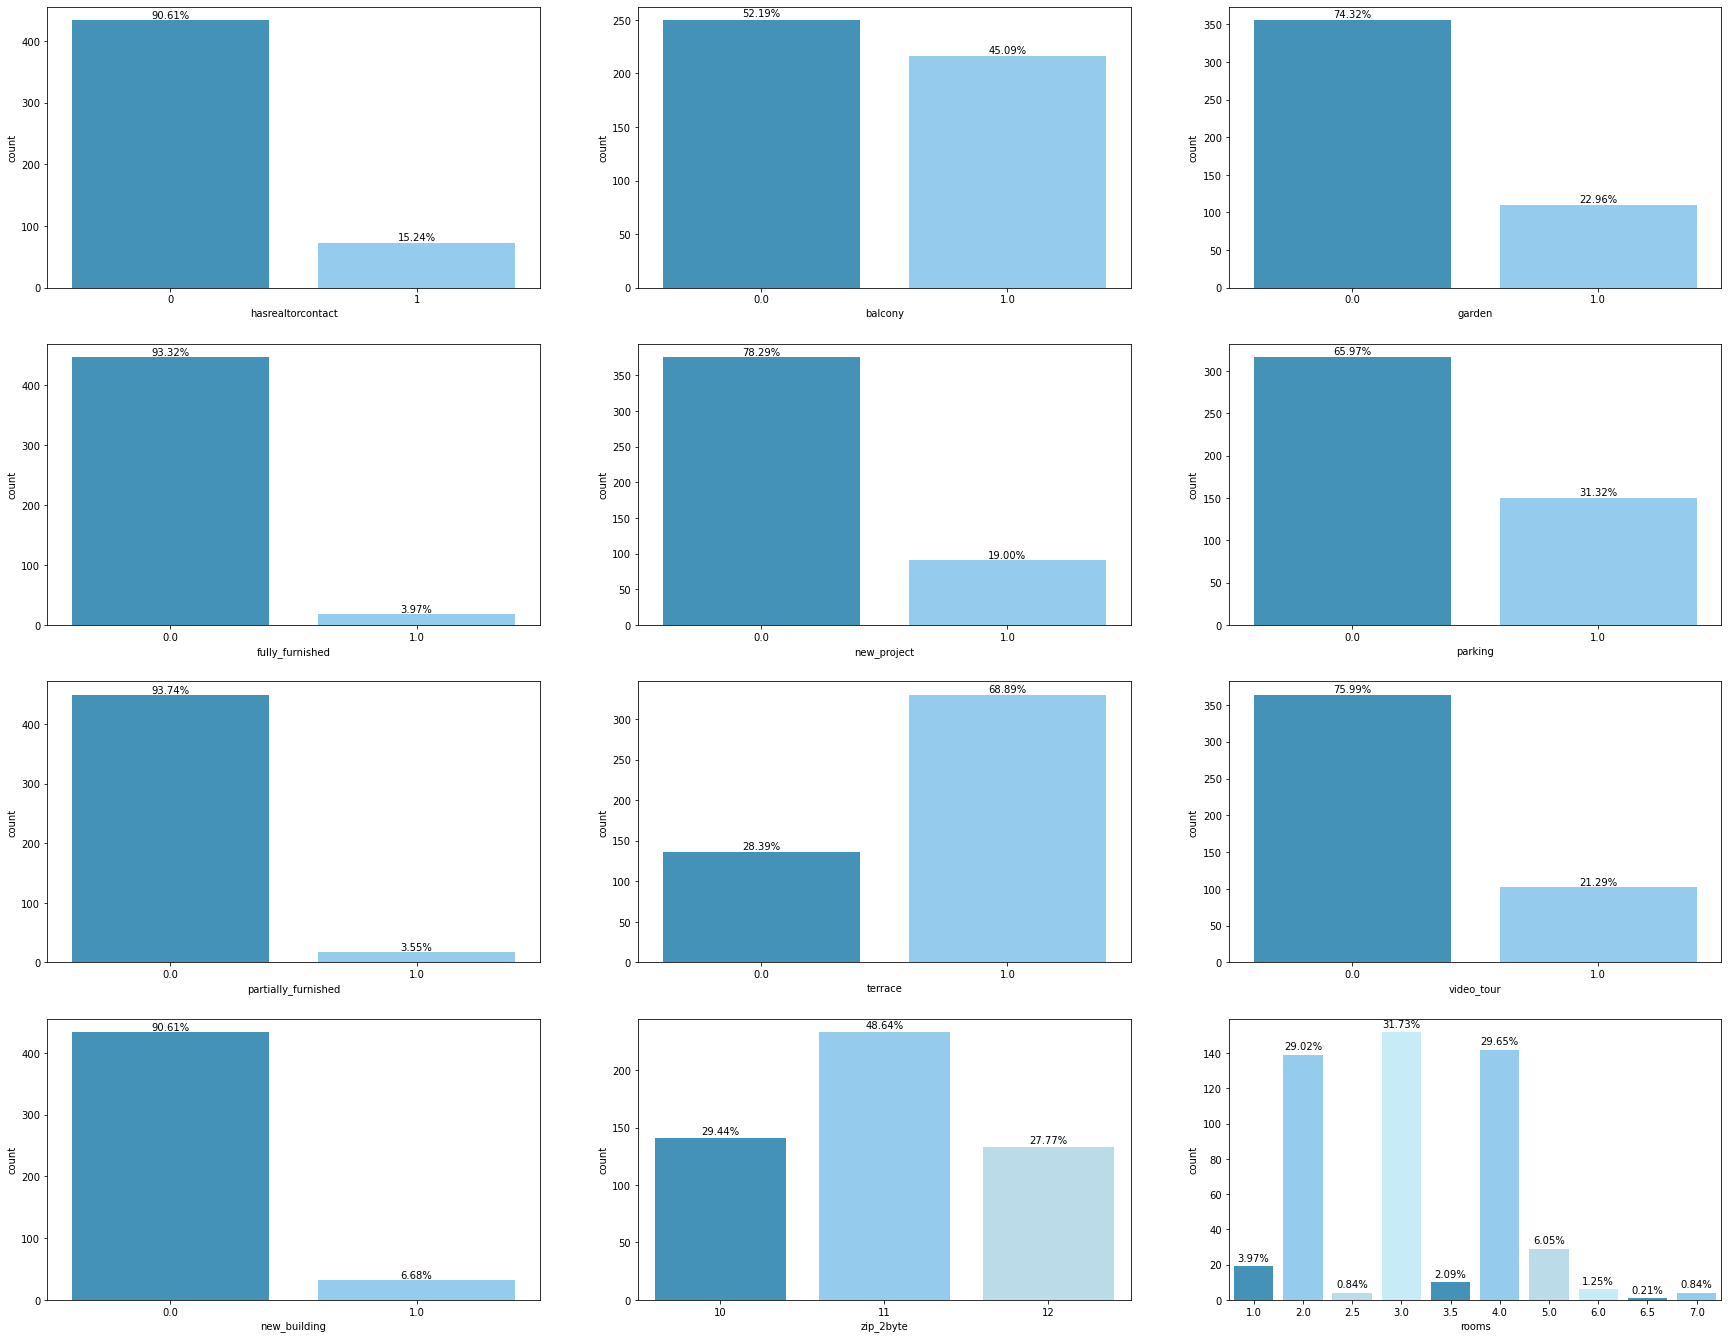

In [16]:
#How is the distribution of discrete attributes

    #The plot shows higher proportion of listings not being new projects and furnished, with missing realtor contact.
    #Highest number of listing are available in '11' zip code zone, followed by '12' and '10'
    #Higher number of listing offer property with 3 rooms, followed by 2 and 4 room houses.
    #There is considerably good distribution of extra features like balcony, garden, parking, terrace and new_building 
        #among the available listings. Video tour option is available among 1/4th of the listings, which is a greater necessity
        #in recent time and situation.

cols = ['hasrealtorcontact','balcony','garden', 'fully_furnished','new_project', 'parking', 'partially_furnished', 'terrace', 
        'video_tour','new_building', 'zip_2byte', 'rooms']
univariate_eda(inpt_df_cleaned, cols, n_cols = 3, figsize = (30,30))

In [17]:
#Correlation between independent variables
    #All variables are independent of each other except for area_m2 and rooms showing 74.63% correlation. Among the 2 correlated
    #fields, area_m2 has greater significance of prediction, hence rooms field will be excluded in further steps
    
corr_matrix = inpt_df_cleaned.corr()
corr_matrix

,hasrealtorlogo,hasrealtorcontact,balcony,garden,fully_furnished,new_project,parking,partially_furnished,terrace,video_tour,new_building,zip_2byte,price,area_m2,rooms
hasrealtorlogo,1.000000,-0.152937,-0.066336,0.010013,-0.103306,-0.112674,-0.033855,-0.008504,0.049850,-0.023136,-0.094825,0.006860,0.060624,0.067170,0.075889
hasrealtorcontact,-0.152937,1.000000,0.019367,0.139874,0.001933,0.283670,0.023180,0.011825,0.052408,0.089604,0.024787,-0.021771,0.115046,0.098813,0.096021
balcony,-0.066336,0.019367,1.000000,0.121735,-0.039317,0.345422,-0.041706,-0.089054,0.047695,-0.034125,-0.048201,0.189290,-0.174576,-0.145589,-0.062321
garden,0.010013,0.139874,0.121735,1.000000,-0.114603,0.478281,-0.004410,-0.054254,0.279038,0.084604,-0.071010,0.297314,-0.165328,-0.093316,0.050422
fully_furnished,-0.103306,0.001933,-0.039317,-0.114603,1.000000,-0.046816,-0.002691,-0.040117,-0.225677,-0.082895,-0.055983,-0.113854,0.058862,0.012866,-0.037432
new_project,-0.112674,0.283670,0.345422,0.478281,-0.046816,1.000000,-0.235116,-0.095853,0.209072,0.092710,-0.133763,0.179605,-0.202494,-0.165676,-0.107230
parking,-0.033855,0.023180,-0.041706,-0.004410,-0.002691,-0.235116,1.000000,0.012933,0.048262,0.012968,-0.023619,-0.047428,0.261624,0.247742,0.215583
partially_furnished,-0.008504,0.011825,-0.089054,-0.054254,-0.040117,-0.095853,0.012933,1.000000,-0.101682,-0.019959,0.173466,-0.059062,0.038797,0.065862,0.057905
terrace,0.049850,0.052408,0.047695,0.279038,-0.225677,0.209072,0.048262,-0.101682,1.000000,-0.002646,-0.105664,0.220138,0.045921,0.095922,0.090469
video_tour,-0.023136,0.089604,-0.034125,0.084604,-0.082895,0.092710,0.012968,-0.019959,-0.002646,1.000000,-0.061653,0.047774,0.128333,0.161772,0.105586


### Step 5: Data split and transformation

In [18]:
print("Shape of data:", inpt_df_cleaned.shape)

print("Numerical features count: ", len(inpt_df_cleaned.dtypes[inpt_df_cleaned.dtypes != "object"].index))
print("Categorical features count: ", len(inpt_df_cleaned.dtypes[inpt_df_cleaned.dtypes == "object"].index))

Shape of data: (507, 15)
Numerical features count:  15
Categorical features count:  0


In [19]:
#--------------------------------------------------------------
#1. Train test split - in 70:30 ratio
#--------------------------------------------------------------

x_train, x_test, y_train, y_test = train_test_split(inpt_df_cleaned, inpt_df_cleaned['price'],test_size=0.3,random_state=0)

x_train = x_train.drop(['price'], axis=1)
x_test = x_test.drop(['price'], axis=1)

print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
x_train.head()

(354, 14) (354,) (153, 14) (153,)


,hasrealtorlogo,hasrealtorcontact,balcony,garden,fully_furnished,new_project,parking,partially_furnished,terrace,video_tour,new_building,zip_2byte,area_m2,rooms
293,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,37.90,2.0
143,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,114.00,4.0
320,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,43.05,2.0
130,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,75.72,3.0
26,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11,78.00,NaN


In [20]:
#--------------------------------------------------------------
#2. Check for missing/null values - Imputation
#--------------------------------------------------------------

print(x_train.isnull().sum(),'\n',x_test.isnull().sum())

hasrealtorlogo          0
hasrealtorcontact       0
balcony                31
garden                 31
fully_furnished        31
new_project            31
parking                31
partially_furnished    31
terrace                31
video_tour             31
new_building           31
zip_2byte               0
area_m2                 0
rooms                   1
dtype: int64 
 hasrealtorlogo          0
hasrealtorcontact       0
balcony                10
garden                 10
fully_furnished        10
new_project            10
parking                10
partially_furnished    10
terrace                10
video_tour             10
new_building           10
zip_2byte               0
area_m2                 0
rooms                   0
dtype: int64


In [21]:
#Missing value imputation
    #The absence of data in the 9 additional feature fields are assumed as unavailability, and hence are imputed with zero

x_train.fillna({'balcony':0,'garden':0,'fully_furnished':0,'new_project':0,'parking':0,'partially_furnished':0,'terrace':0,'video_tour':0,'new_building':0}, inplace=True)
x_test.fillna({'balcony':0,'garden':0,'fully_furnished':0,'new_project':0,'parking':0,'partially_furnished':0,'terrace':0,'video_tour':0,'new_building':0}, inplace=True)

x_train['rooms'] = x_train['rooms'].fillna(x_train['rooms'].value_counts().index[0])
x_test['rooms'] = x_test['rooms'].fillna(x_test['rooms'].value_counts().index[0])

print(x_train.isnull().sum(),'\n',x_test.isnull().sum())

hasrealtorlogo         0
hasrealtorcontact      0
balcony                0
garden                 0
fully_furnished        0
new_project            0
parking                0
partially_furnished    0
terrace                0
video_tour             0
new_building           0
zip_2byte              0
area_m2                0
rooms                  0
dtype: int64 
 hasrealtorlogo         0
hasrealtorcontact      0
balcony                0
garden                 0
fully_furnished        0
new_project            0
parking                0
partially_furnished    0
terrace                0
video_tour             0
new_building           0
zip_2byte              0
area_m2                0
rooms                  0
dtype: int64


### Step6: Model building and Evaluation

Considering the outcome(Price of property) is continuous, regression models are built and evaluated for predictions.

Algorithms: Linear regression and Random forest regressor
            
Evaluation metrics: Mean Absolute Error, Mean Squared Error, Root Mean Square Error, R2, Adjusted R2, Residual analysis 

In [22]:
#Defining functions

def print_evaluate(true, predicted,x_test):  
    mae = round(metrics.mean_absolute_error(true, predicted),3)
    mse = round(metrics.mean_squared_error(true, predicted),3)
    rmse = round(np.sqrt(metrics.mean_squared_error(true, predicted)),3)
    r2_square = round(metrics.r2_score(true, predicted),3)
    adj_r2_square = round(1 - (1-r2_square)*(len(true)-1)/(len(true)-x_test.shape[1]-1),3)
    print('Mean Absolute Error (MAE):', mae)
    print('Mean Squared Error (MSE):', mse)
    print('Root Mean Square Error (RMSE):', rmse)
    print('R2 value', r2_square)
    print('Adjusted R2 value', adj_r2_square)
    
def evaluate(true, predicted,x_test):
    mae = round(metrics.mean_absolute_error(true, predicted),3)
    mse = round(metrics.mean_squared_error(true, predicted),3)
    rmse = round(np.sqrt(metrics.mean_squared_error(true, predicted)),3)
    r2_square = round(metrics.r2_score(true, predicted),3)
    adj_r2_square = round(1 - (1-r2_square)*(len(true)-1)/(len(true)-x_test.shape[1]-1),3)
    return mae, mse, rmse, r2_square, adj_r2_square

def show_metrics():
    print('Test set evaluation:\n')
    print_evaluate(y_test, test_pred,x_test)
    print('\nTrain set evaluation:\n')
    print_evaluate(y_train, train_pred,x_test)

In [23]:
#Scaling is performed to address the difference in data scales in independent attributes

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

x_train = pd.DataFrame(pipeline.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(pipeline.transform(x_test),columns = x_test.columns)

#### 1. Linear regression

Multiple linear regression model is built assuming the required assumptions are met

In [24]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(x_train,y_train)

test_pred = lin_reg.predict(x_test)
train_pred = lin_reg.predict(x_train)

show_metrics()

model_results = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred,x_test)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Adjusted R2 Square'])

Test set evaluation:

Mean Absolute Error (MAE): 419227.978
Mean Squared Error (MSE): 343794695842.933
Root Mean Square Error (RMSE): 586340.085
R2 value 0.812
Adjusted R2 value 0.793

Train set evaluation:

Mean Absolute Error (MAE): 414934.016
Mean Squared Error (MSE): 385242664241.273
Root Mean Square Error (RMSE): 620679.196
R2 value 0.822
Adjusted R2 value 0.815


#### 2. Random Forest Regressor

In [25]:
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(x_train, y_train)

test_pred = rf_reg.predict(x_test) 
train_pred = rf_reg.predict(x_train)

show_metrics()

model_results4 = pd.DataFrame(data=[["Random Forest Regressor", *evaluate(y_test, test_pred,x_test)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Adjusted R2 Square'])
model_results = model_results.append(model_results4, ignore_index=True)

Test set evaluation:

Mean Absolute Error (MAE): 289033.296
Mean Squared Error (MSE): 300352718254.398
Root Mean Square Error (RMSE): 548044.449
R2 value 0.836
Adjusted R2 value 0.819

Train set evaluation:

Mean Absolute Error (MAE): 103283.255
Mean Squared Error (MSE): 47207343206.735
Root Mean Square Error (RMSE): 217272.509
R2 value 0.978
Adjusted R2 value 0.977


#### Modelling With feature selection

In [26]:
#Considering stepwise selection method for feature selection

sws = SFS(LinearRegression(), k_features=(10), forward=True, 
           floating=True, verbose=2,scoring='r2', cv=5)
sws = sws.fit(x_train, y_train)

print('Significant features from Stepwise selection method: {}'.format(x_train.columns[list(sws.k_feature_idx_)]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished

[2022-03-24 16:44:40] Features: 1/10 -- score: 0.6925824116324589[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2022-03-24 16:44:40] Features: 2/10 -- score: 0.7423731551838794[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jo

Significant features from Stepwise selection method: Index(['hasrealtorlogo', 'hasrealtorcontact', 'balcony', 'garden',
       'new_project', 'terrace', 'new_building', 'zip_2byte', 'area_m2',
       'rooms'],
      dtype='object')


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-03-24 16:44:41] Features: 10/10 -- score: 0.7578596108235677

In [27]:
#Excluding 'rooms' column for model building, considering its high correlation with area_m2 field

x_train_new = x_train[['hasrealtorlogo', 'hasrealtorcontact', 'balcony', 'garden',
       'new_project', 'parking', 'new_building', 'zip_2byte', 'area_m2',]]
x_test_new = x_test[['hasrealtorlogo', 'hasrealtorcontact', 'balcony', 'garden',
       'new_project', 'parking', 'new_building', 'zip_2byte', 'area_m2',]]

#### 1. Linear regression

In [28]:
lin_reg_fs = LinearRegression(normalize=True)
lin_reg_fs.fit(x_train_new,y_train)

# print the intercept
print(lin_reg.intercept_)

#Printing model co-effients to analyse variable significance
coeff_df = pd.DataFrame(lin_reg.coef_, x_train.columns, columns=['Coefficient'])
coeff_df

1029531.8700564969


,Coefficient
hasrealtorlogo,4.373771e+04
hasrealtorcontact,9.700525e+04
balcony,1.637653e+04
garden,8.066678e+03
fully_furnished,4.282026e+04
new_project,-7.329991e+04
parking,6.946477e+04
partially_furnished,-5.580414e+03
terrace,2.416421e+04
video_tour,2.835747e+04


In [29]:
test_pred = lin_reg_fs.predict(x_test_new)
train_pred = lin_reg_fs.predict(x_train_new)

test_pred_lr = test_pred.copy()
show_metrics()

model_results5 = pd.DataFrame(data=[["Linear regression with Feature selection", *evaluate(y_test, test_pred,x_test)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Adjusted R2 Square'])
model_results = model_results.append(model_results5, ignore_index=True)

Test set evaluation:

Mean Absolute Error (MAE): 481808.988
Mean Squared Error (MSE): 474610461858.609
Root Mean Square Error (RMSE): 688919.779
R2 value 0.74
Adjusted R2 value 0.714

Train set evaluation:

Mean Absolute Error (MAE): 478775.095
Mean Squared Error (MSE): 521952810213.585
Root Mean Square Error (RMSE): 722463.017
R2 value 0.758
Adjusted R2 value 0.748


In [30]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train_new, y_train)

test_pred = rf_reg.predict(x_test_new) 
train_pred = rf_reg.predict(x_train_new)

test_pred_rf = test_pred.copy()
show_metrics()

model_results6 = pd.DataFrame(data=[["Random Forest Regressor with feature selection", *evaluate(y_test, test_pred,x_test)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square','Adjusted R2 Square'])
model_results = model_results.append(model_results6, ignore_index=True)

Test set evaluation:

Mean Absolute Error (MAE): 289014.038
Mean Squared Error (MSE): 287462324036.988
Root Mean Square Error (RMSE): 536155.131
R2 value 0.843
Adjusted R2 value 0.827

Train set evaluation:

Mean Absolute Error (MAE): 113059.896
Mean Squared Error (MSE): 59872692681.909
Root Mean Square Error (RMSE): 244688.971
R2 value 0.972
Adjusted R2 value 0.971


### Step6: Checking Assumptions and plotting model performance 

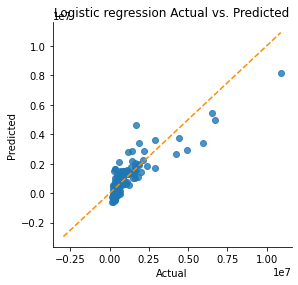

In [31]:
# MLR Assumption 1:Linearity - Linear Relationship between the Target and the Feature
# Checking with a scatter plot of actual vs. predicted (residual analysis). Predictions should follow the diagonal line.

df_results = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred_lr})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=4)

# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Logistic regression Actual vs. Predicted')
plt.show()

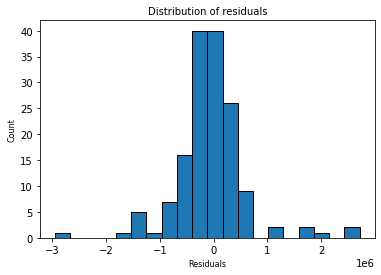

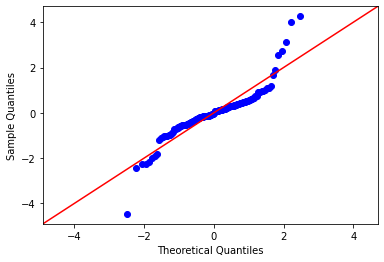

In [32]:
# MLR Assumption 2: The error terms are normally distributed

plt.hist(df_results['Residuals'],bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=8)
plt.xlabel('Residuals',fontsize=8)
plt.title("Distribution of residuals",fontsize=10)

fig = sm.qqplot(df_results['Residuals'], fit=True, line="45")

Text(0.5, 1.0, 'Correlation of Variables')

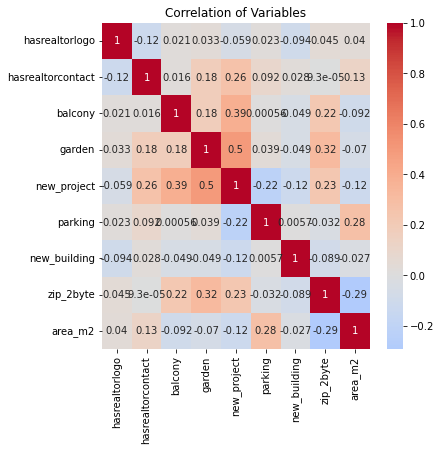

In [33]:
# MLR Assumption 3: Little to no multicollinearity among predictors

plt.figure(figsize=(6,6))
sns.heatmap(x_train_new.corr(),annot=True, fmt='.2g',center= 0,cmap= 'coolwarm')
plt.title('Correlation of Variables')

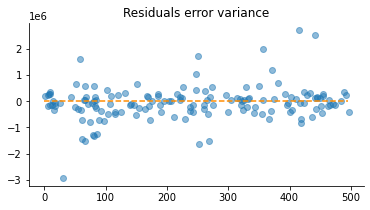

In [34]:
# MLR Assumption 4: Homoscedasticity of Error Terms - Residuals should have relative constant variance

# Plotting the residuals
plt.subplots(figsize=(6, 3))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals error variance')
plt.show()  

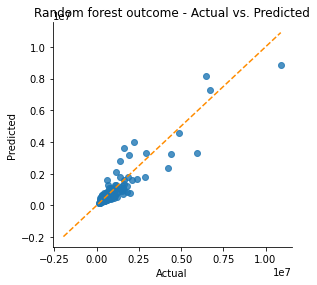

In [35]:
# Plotting Random forest model performance - Residual analysis

df_results_rf = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred_rf})
df_results_rf['Residuals'] = abs(df_results_rf['Actual']) - abs(df_results_rf['Predicted'])

# Plotting the actual vs predicted values
sns.lmplot(x='Actual', y='Predicted', data=df_results_rf, fit_reg=False, size=4)

# Plotting the diagonal line
line_coords = np.arange(df_results_rf.min().min(), df_results_rf.max().max())
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')
plt.title('Random forest outcome - Actual vs. Predicted')
plt.show()

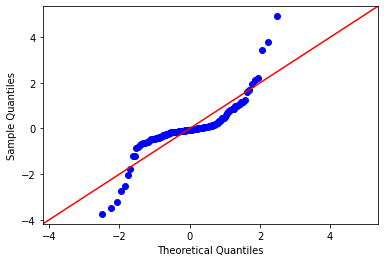

In [36]:
# Plotting Random forest model performance - Residual analysis

fig = sm.qqplot(df_results_rf['Residuals'], fit=True, line="45")
plt.show()

In [37]:
#### Model performance results

model_results

,Model,MAE,MSE,RMSE,R2 Square,Adjusted R2 Square
0,Linear Regression,419227.978,3.437947e+11,586340.085,0.812,0.793
1,Random Forest Regressor,289033.296,3.003527e+11,548044.449,0.836,0.819
2,Linear regression with Feature selection,481808.988,4.746105e+11,688919.779,0.740,0.714
3,Random Forest Regressor with feature selection,289014.038,2.874623e+11,536155.131,0.843,0.827


### Conclusion:

#### Outcome analysis:

1. Performance of Linear regression performance is good considering the usage of real-time data. And it also satisfies all the linear regression assumptions.

2. Considering all the model performance parameters such as Mean Absolute Error, Mean Squared Error, Root Mean Square Error, R2, Adjusted R2, Residual analysis, Random forest regression outperforms Linear regression model.

3. The residual analysis also shows that Random forest regressor prediction is more accurate and close to actual value.


#### Scope of the model:

1. Data - Selection bias while scraping the data from the web, unreasonably priced properties and non-disclosure/unavailability of certain predictors like price, exact location, floor number, neighborhood details etc.

2. Model - 
  
   a. Though Random forest model outperforms Linear regression model, its inability to extrapolate target value makes it a bad choice in certain cases.
    
    b. Also, location plays an important role in predicting property price. More importance can be given to address field by extracting longitude and latitude values  and identifying the factors such as distance from city centre etc.
